# Regression analysis for correlated variables: bivariate case

In [1]:
import pandas as pd
import numpy as np
from numpy.random import multivariate_normal

In [2]:
import matplotlib.pyplot as plt

Linear model is $$E[Y|A,B]=E[Y]+a(A-E[A])+b(B-E[B])$$

In [3]:
Sa = 3
Sb = 5
def model(a, b):
    return Sa * a + Sb * b

In [4]:
Va = 2
Vb = 1.5
Cab = 0.4 * np.sqrt(Va) * np.sqrt(Vb)

In [5]:
C = np.array([
    [Va, Cab],
    [Cab, Vb],
])

In [6]:
N = 1000

In [7]:
X = multivariate_normal(mean=[0, 0], cov=C, size=N)

In [8]:
Y = np.array([model(*row) for row in X])

Regression model is $$
\begin{bmatrix}
Var(A) & Cov(A,B)\\
Cov(A,B) & Var(B)
\end{bmatrix}
\begin{bmatrix}
a\\
b
\end{bmatrix}=
\begin{bmatrix}
Cov(E[Y|A,B], A)\\
Cov(E[Y|A,B], B)
\end{bmatrix}
$$

simplified as $$C S = Z$$

In [9]:
Z = np.array([np.cov(Y, row)[0, 1] for row in X.T])

In [10]:
np.linalg.inv(C) @ Z

array([3.17159404, 5.28605383])

## Case 1: dependence on the sample size

In [11]:
def foo(n):
    X = multivariate_normal(mean=[0, 0], cov=C, size=n)
    Y = np.array([model(*row) for row in X])
    Z = np.array([np.cov(Y, row)[0, 1] for row in X.T])
    return np.linalg.inv(C) @ Z

In [12]:
df = pd.DataFrame({n: [*foo(n)] for n in np.arange(0, 10001, 20)[1::]}).T
df.columns = ["A", "B"]

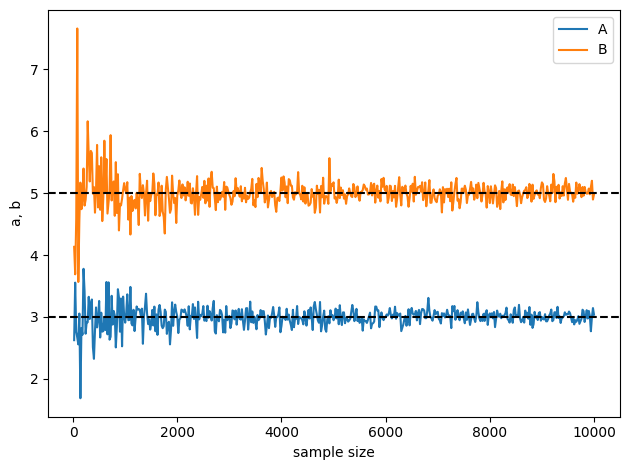

In [13]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set(
    xlabel="sample size",
    ylabel="a, b",
)
ax.axhline(Sa, ls="--", color="k")
ax.axhline(Sb, ls="--", color="k")
fig.tight_layout();

## Case 2: dependence on correlation

In [14]:
def foo(cab):
    cov = np.array([
        [Va, cab],
        [cab, Vb],
    ])
    X = multivariate_normal(mean=[0, 0], cov=cov, size=2000)
    Y = np.array([model(*row) for row in X])
    Z = np.array([np.cov(Y, row)[0, 1] for row in X.T])
    return np.linalg.inv(cov) @ Z

In [15]:
df = pd.DataFrame({n: [*foo(n)] for n in np.linspace(0, 0.7, 100)}).T
df.columns = ["A", "B"]

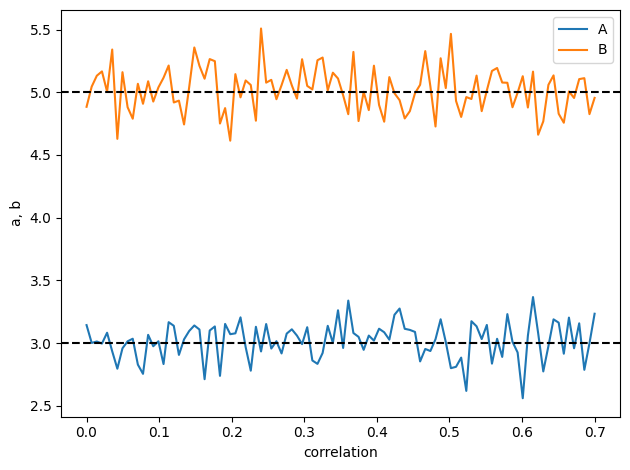

In [16]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set(
    xlabel="correlation",
    ylabel="a, b",
)
ax.axhline(Sa, ls="--", color="k")
ax.axhline(Sb, ls="--", color="k")
fig.tight_layout();